# Homework Assignment  6

##**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [10]:
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install turicreate

     |████████████████████████████████| 15.7 MB 24.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.18.5 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
jaxlib 0.3.7+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.8 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have foli

In [11]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"danasror","key":"83f2d5cd8d8b7d0c9848067dc056909f"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [12]:
!kaggle datasets list -s 'amazon fine food reviews'


ref                                       title                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------  ------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/snap/amazon-fine-food-reviews    Amazon Fine Food Reviews  242MB  2017-05-01 18:51:31         119843       1860  0.7941176        
datasets/ajaysh/amazon-fine-food-reviews  Amazon Fine Food Reviews  128MB  2018-05-15 10:01:32            292          7  0.4117647        
datasets/wolfram77/graphs-online-reviews  Online reviews Graphs       3GB  2021-11-12 07:43:43              8          1  0.84375          
datasets/apoorvaduraisamy/mydataset       mydataset                  14KB  2021-02-05 14:48:11              0          0  0.0              


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!mkdir ./datasets
!mkdir ./datasets/FoodReviews

# download the dataset from Kaggle and unzip it
!kaggle datasets download snap/amazon-fine-food-reviews -p ./datasets/FoodReviews
!unzip ./datasets/FoodReviews/*.zip  -d ./datasets/FoodReviews/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/FoodReviews’: File exists
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/FoodReviews/amazon-fine-food-reviews.zip
replace ./datasets/FoodReviews/Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/FoodReviews/Reviews.csv  
replace ./datasets/FoodReviews/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/FoodReviews/database.sqlite  y
y

replace ./datasets/FoodReviews/hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: ./datasets/FoodReviews/hashes.txt  


In [15]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/FoodReviews/Reviews.csv")
sf

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/FoodReviews/Reviews.csv

Parsing completed. Parsed 100 lines in 1.30168 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 44688.1

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/FoodReviews/Reviews.csv

Parsing completed. Parsed 260995 lines in 4.1484 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [16]:
# select rellevant feature
cls_sf = sf['Score', 'Summary', 'Text']

# remove rows with 3 score - this is middle score
cls_sf = cls_sf[cls_sf['Score'] != 3]
def score_to_review(score):
    if score >= 4:
        return "FiveStar"
    else:
        return "OneStar"

cls_sf['sentiment'] = cls_sf['Score'].apply(lambda score: score_to_review(score))
cls_sf

Score,Summary,Text,sentiment
5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...,FiveStar
1,Not as Advertised,Product arrived labeledas Jumbo Salted ...,OneStar
4,"""Delight"" says it all",This is a confection thathas been around a few ...,FiveStar
2,Cough Medicine,If you are looking forthe secret ingredient in ...,OneStar
5,Great taffy,Great taffy at a greatprice. There was a wide ...,FiveStar
4,Nice Taffy,I got a wild hair fortaffy and ordered this ...,FiveStar
5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...,FiveStar
5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...,FiveStar
5,Yay Barley,Right now I'm mostly justsprouting this so my ...,FiveStar
5,Healthy Dog Food,This is a very healthydog food. Good for their ...,FiveStar


In [17]:
cls_sf['words_1grams'] = tc.text_analytics.count_ngrams(cls_sf['Text'], n=1, method='word')
cls_sf['words_2grams'] = tc.text_analytics.count_ngrams(cls_sf['Text'], n=2, method='word')
cls_sf

Score,Summary,Text,sentiment,words_1grams
5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...,FiveStar,"{'most': 1, 'this': 1,'appreciates': 1, ..."
1,Not as Advertised,Product arrived labeledas Jumbo Salted ...,OneStar,"{'to': 1, 'intended': 1,'salted': 1, 'as': 2, ..."
4,"""Delight"" says it all",This is a confection thathas been around a few ...,FiveStar,"{'sisters': 1, 'brother':1, 'out': 1, 'selling': ..."
2,Cough Medicine,If you are looking forthe secret ingredient in ...,OneStar,"{'medicinal': 1,'flavor': 1, 'soda': 1, ..."
5,Great taffy,Great taffy at a greatprice. There was a wide ...,FiveStar,"{'deal': 1, 'lover': 1,'this': 1, 'your': 1, ..."
4,Nice Taffy,I got a wild hair fortaffy and ordered this ...,FiveStar,"{'treat': 1,'delightful': 1, 'it' ..."
5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...,FiveStar,"{'everyone': 1, 'themed':1, 'at': 1, 'served': 1, ..."
5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...,FiveStar,"{'recommend': 1, 'would':1, 'i': 1, 'amazing': 1, ..."
5,Yay Barley,Right now I'm mostly justsprouting this so my ...,FiveStar,"{'too': 1, 'rye': 1,'my': 1, 'just': 1, ..."
5,Healthy Dog Food,This is a very healthydog food. Good for their ...,FiveStar,"{'feeding': 1, 'at': 1,'her': 1, 'required': 1, ..."


In [18]:
train, test = cls_sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 183928

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1533097

Number of coefficients      : 1533098

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.080422  | 7.145953     | 0.846668          | 0.848879            |

| 1         | 9        | 1.688871  | 15.684912    | 0.922703          | 0.877285            |

| 2         | 10       | 1.688871  | 17.852866    | 0.995525          | 0.947526            |

| 3         | 11       | 1.688871  | 20.006812    | 0.997961          | 0.948456            |

| 4         | 13       | 1.688871  | 23.492023    | 0.999125          | 0.952278            |

| 6         | 15       | 1.688871  | 27.925514    | 0.999842          | 0.953827            |

| 7         | 16       | 1.688871  | 30.096965    | 0.999935          | 0.953827            |

| 8         | 18       | 1.187190  | 33.650845    | 0.999951          | 0.953724            |

| 9         | 22       | 1.329500  | 39.810703    | 0.999935          | 0.953930            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183928

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1533097

Number of coefficients    : 1533098

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.082380  | 6.281702     | 0.846668          | 0.848879            |

| 1         | 11       | 4.366132  | 14.271314    | 0.992568          | 0.947733            |

| 2         | 16       | 3.821533  | 21.086811    | 0.998543          | 0.952691            |

| 3         | 17       | 3.821533  | 23.146807    | 0.999456          | 0.944737            |

| 4         | 19       | 1.422557  | 26.338082    | 0.999636          | 0.950625            |

| 6         | 21       | 1.422557  | 30.449159    | 0.999908          | 0.950418            |

| 7         | 23       | 0.913907  | 33.619791    | 0.999897          | 0.950212            |

| 8         | 24       | 1.000000  | 35.653764    | 0.999935          | 0.950625            |

| 9         | 26       | 0.991806  | 38.887089    | 0.999940          | 0.950832            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9539303790930689
PROGRESS: SVMClassifier                   : 0.9508315256688359
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [19]:
cls.evaluate(test)

{'accuracy': 0.953412512546002,
 'auc': 0.9698696480686071,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   OneStar    |     FiveStar    |  1706 |
 |   FiveStar   |     OneStar     |  522  |
 |   FiveStar   |     FiveStar    | 39939 |
 |   OneStar    |     OneStar     |  5657 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8354748190813763,
 'log_loss': 0.15385931915781315,
 'precision': 0.9155203107298916,
 'recall': 0.7683009642808638,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+---------------------+--------------------+------+-------+
 | threshold |         fpr         |        tpr         |  p   |   n   |
 +-----------+---------------------+--------------------+------+-------+
 |    0

##**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [20]:
train, test = cls_sf[:100000].random_split(0.8)

In [21]:
from afinn import Afinn
afinn = Afinn(language='en')

train['afinn_score'] = train['Text'].apply(lambda t: afinn.score(t))
test['afinn_score'] = test['Text'].apply(lambda t: afinn.score(t))
train

Score,Summary,Text,sentiment,words_1grams
5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...,FiveStar,"{'most': 1, 'this': 1,'appreciates': 1, ..."
1,Not as Advertised,Product arrived labeledas Jumbo Salted ...,OneStar,"{'to': 1, 'intended': 1,'salted': 1, 'as': 2, ..."
4,"""Delight"" says it all",This is a confection thathas been around a few ...,FiveStar,"{'sisters': 1, 'brother':1, 'out': 1, 'selling': ..."
2,Cough Medicine,If you are looking forthe secret ingredient in ...,OneStar,"{'medicinal': 1,'flavor': 1, 'soda': 1, ..."
5,Great taffy,Great taffy at a greatprice. There was a wide ...,FiveStar,"{'deal': 1, 'lover': 1,'this': 1, 'your': 1, ..."
4,Nice Taffy,I got a wild hair fortaffy and ordered this ...,FiveStar,"{'treat': 1,'delightful': 1, 'it' ..."
5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...,FiveStar,"{'everyone': 1, 'themed':1, 'at': 1, 'served': 1, ..."
5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...,FiveStar,"{'recommend': 1, 'would':1, 'i': 1, 'amazing': 1, ..."
5,Healthy Dog Food,This is a very healthydog food. Good for their ...,FiveStar,"{'feeding': 1, 'at': 1,'her': 1, 'required': 1, ..."
5,The Best Hot Sauce in theWorld ...,I don't know if it's thecactus or the tequila or ...,FiveStar,"{'service': 1,'incredible': 1, ..."


In [22]:
cls = tc.boosted_trees_classifier.create(train,features=['afinn_score', 'words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 76156

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 922841

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.544359     | 0.869859          | 0.867548            | 0.536823          | 0.538209            |

| 2         | 5.142861     | 0.875217          | 0.869294            | 0.449907          | 0.452476            |

| 3         | 7.731558     | 0.877909          | 0.870292            | 0.396050          | 0.398668            |

| 4         | 10.288465    | 0.882636          | 0.875281            | 0.360951          | 0.364831            |

| 5         | 12.791407    | 0.884737          | 0.877027            | 0.335680          | 0.339790            |

| 10        | 25.227680    | 0.894243          | 0.884510            | 0.277986          | 0.287683            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [23]:
affin_evaluation = cls.evaluate(test)
affin_evaluation

{'accuracy': 0.8888328711872951,
 'auc': 0.8972825359210851,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   FiveStar   |     OneStar     |  318  |
 |   OneStar    |     OneStar     |  1240 |
 |   OneStar    |     FiveStar    |  1887 |
 |   FiveStar   |     FiveStar    | 16390 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.5293489861259338,
 'log_loss': 0.2863703661174684,
 'precision': 0.7958921694480102,
 'recall': 0.3965462104253278,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 3127 | 16708 |
 |   0.001   | 1.0 | 1.0 | 3127 | 16708 |
 |   0.002   | 1

In [24]:
! pip install -U textblob
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [25]:
from textblob import TextBlob

train['blob_score'] = train['Text'].apply(lambda t: TextBlob(t).sentences[0].polarity)
test['blob_score'] = test['Text'].apply(lambda t: TextBlob(t).sentences[0].polarity)
cls = tc.boosted_trees_classifier.create(train[:],features=['blob_score', 'words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 76156

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 924798

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.538263     | 0.857831          | 0.847842            | 0.551059          | 0.554066            |

| 2         | 5.001176     | 0.866590          | 0.854078            | 0.471389          | 0.478718            |

| 3         | 7.500493     | 0.866970          | 0.852582            | 0.422117          | 0.432574            |

| 4         | 10.011654    | 0.868139          | 0.854577            | 0.389437          | 0.401916            |

| 5         | 12.488969    | 0.868953          | 0.853829            | 0.366713          | 0.382376            |

| 10        | 24.919434    | 0.878959          | 0.864305            | 0.309411          | 0.332380            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [26]:
textblob_evaluation = cls.evaluate(test)
textblob_evaluation

{'accuracy': 0.8744643307285103,
 'auc': 0.8663761489031985,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   OneStar    |     OneStar     |  726  |
 |   FiveStar   |     OneStar     |   89  |
 |   OneStar    |     FiveStar    |  2401 |
 |   FiveStar   |     FiveStar    | 16619 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.3683409436834094,
 'log_loss': 0.318928303224729,
 'precision': 0.8907975460122699,
 'recall': 0.23217141029740965,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 3127 | 16708 |
 |   0.001   | 1.0 | 1.0 | 3127 | 16708 |
 |   0.002   | 1

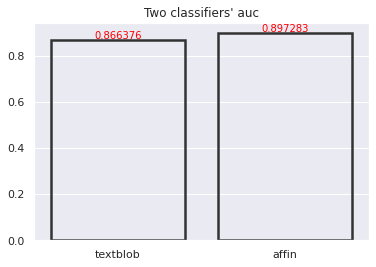

In [27]:
# Compare the two classifiers results and visualize it
import pandas as pd
auc_scores = pd.DataFrame()
auc_scores['textblob'] = [textblob_evaluation['auc']]
auc_scores['affin'] = [affin_evaluation['auc']]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
ax = sns.barplot(data=auc_scores,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Two classifiers' auc")
for p in ax.patches:
             ax.annotate("%f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='red', xytext=(0, 5),
                 textcoords='offset points')

##**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [28]:
!mkdir ./datasets/hotels

# download the dataset from Kaggle and unzip it
!kaggle datasets download datafiniti/hotel-reviews -p ./datasets/hotels
!unzip ./datasets/hotels/*.zip  -d ./datasets/hotels
! ls -l ./datasets/hotels

mkdir: cannot create directory ‘./datasets/hotels’: File exists
hotel-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/hotels/hotel-reviews.zip
replace ./datasets/hotels/7282_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/hotels/7282_1.csv  
replace ./datasets/hotels/Datafiniti_Hotel_Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews.csv  
replace ./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv  
total 199488
-rw-r--r-- 1 root root  16548391 Sep 20  2019 7282_1.csv
-rw-r--r-- 1 root root  49564735 Sep 20  2019 Datafiniti_Hotel_Reviews.csv
-rw-r--r-- 1 root root 124452060 Sep 20  2019 Datafiniti_Hotel_Reviews_Jun19.csv
-rw-r--r-- 1 root root  13705194 May 12 09:47 hotel-reviews.zip


In [29]:
import spacy
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install
nlp = spacy.load('en_core_web_lg')

     |████████████████████████████████| 827.9 MB 1.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [30]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv")

sf = sf[(sf['reviews.rating'] <=1) | (sf['reviews.rating'] >= 5)]

def points2sentiment(points):
    if points >= 5:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['reviews.rating'].apply(lambda points: points2sentiment(points))

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 100 lines in 2.45997 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,float,float,str,int,str,str,str,str,int,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 4219 lines. Lines per second: 1783.22

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 10000 lines in 3.16489 secs.

In [31]:
sf

id,dateAdded,dateUpdated,address
AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box3574 ...
AVweLARAByjofQCxv5vX,2016-05-16T22:39:30Z,2019-05-20T23:28:44Z,167 W Main St
AV1thAoL3-Khe5l_Ott5,2017-07-23T03:35:56Z,2019-05-20T23:28:32Z,115 W Steve Wariner Dr
AVz6h4Sb3D1zeR_xDHsu,2017-06-30T19:43:24Z,2019-05-20T23:27:06Z,2240 Buena Vista Rd
AVwdo6WHByjofQCxrGaj,2016-11-02T17:23:39Z,2019-05-20T23:26:47Z,1107 N Main St
AVwcuo0eIN2L1WUfoPEk,2016-03-23T04:19:28Z,2019-05-20T23:26:33Z,1953 Nicholasville Rd
AVwdhvN2kufWRAb56xSm,2017-01-16T18:09:54Z,2019-05-20T23:08:26Z,1818 El Camino Real
AWV8VsCtRxPSIh2RyTvS,2018-08-27T17:01:16Z,2019-05-20T21:40:08Z,610 Poydras St
AWV8VsCtRxPSIh2RyTvS,2018-08-27T17:01:16Z,2019-05-20T21:40:08Z,610 Poydras St
AWV8VsCtRxPSIh2RyTvS,2018-08-27T17:01:16Z,2019-05-20T21:40:08Z,610 Poydras St


In [32]:
from tqdm import tqdm

l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["reviews.text"]
    l.append(nlp(text).vector)
sf['vector'] = l 

100%|██████████| 5407/5407 [02:46<00:00, 32.51it/s]


In [33]:
train, test  = sf.random_split(0.8)
cls1 = tc.random_forest_classifier.create(train,features=['vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4109

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.113667     | 0.968362          | 0.940092            | 0.194608          | 0.212648            |

| 2         | 0.228181     | 0.968606          | 0.944700            | 0.186493          | 0.219371            |

| 3         | 0.329552     | 0.977853          | 0.953917            | 0.183214          | 0.204508            |

| 4         | 0.430991     | 0.976637          | 0.972350            | 0.182121          | 0.197353            |

| 5         | 0.532056     | 0.979070          | 0.972350            | 0.181338          | 0.199572            |

| 10        | 1.039337     | 0.981747          | 0.967742            | 0.177670          | 0.195506            |

| 50        | 4.989605     | 0.984181          | 0.958525            | 0.175397          | 0.199407            |

| 100       | 9.916463     | 0.984181          | 0.963134            | 0.175882          | 0.202411            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [34]:
ev1 = cls1.evaluate(test)
print(ev1)

{'accuracy': 0.9472710453283997, 'auc': 0.9584985761456344, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |   7   |
|   Negative   |     Negative    |   69  |
|   Positive   |     Positive    |  955  |
|   Negative   |     Positive    |   50  |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.971021860701576, 'log_loss': 0.22722369537954284, 'precision': 0.9502487562189055, 'recall': 0.9927234927234927, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 1001

Data:
+-----------+-----+-----+-----+-----+
| threshold | fpr | tpr |  p  |  n  |
+-----------+-----+-----+-----+-----+
|    0.0    | 1.0 | 1.0 | 962 | 119 |
|   0.001   | 1.0 | 1.0 | 962 | 119 |
|   0.002   | 1.0 | 1.0 | 962 | 119 |
|   0.003   | 1.0 | 1.0 | 962

In [35]:
# we will improve by adding n-grams features
sf['1grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=1, method='word')
sf['2grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=2, method='word')
sf['3grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=3, method='word')
train, test  = sf.random_split(0.8)
cls2 = tc.random_forest_classifier.create(train,features=['1grams', '2grams','vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4117

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 140854

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.264520     | 0.966723          | 0.935484            | 0.202880          | 0.246705            |

| 2         | 0.505487     | 0.963566          | 0.930876            | 0.190616          | 0.241354            |

| 3         | 0.764366     | 0.979354          | 0.926267            | 0.183422          | 0.240621            |

| 4         | 1.030662     | 0.975953          | 0.926267            | 0.182578          | 0.232621            |

| 5         | 1.270107     | 0.980568          | 0.940092            | 0.181084          | 0.230284            |

| 10        | 2.528465     | 0.980568          | 0.921659            | 0.179487          | 0.234167            |

| 25        | 6.202525     | 0.978625          | 0.930876            | 0.178541          | 0.241602            |

| 50        | 12.292840    | 0.977897          | 0.930876            | 0.179821          | 0.244604            |

| 75        | 18.408372    | 0.978382          | 0.926267            | 0.179250          | 0.243596            |

| 100       | 24.573861    | 0.979354          | 0.935484            | 0.178995          | 0.241216            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [36]:
ev2 = cls2.evaluate(test)
print(ev2)

{'accuracy': 0.9543336439888164, 'auc': 0.9782463574621234, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |   14  |
|   Negative   |     Positive    |   35  |
|   Negative   |     Negative    |   72  |
|   Positive   |     Positive    |  952  |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.974910394265233, 'log_loss': 0.21302316388854028, 'precision': 0.9645390070921985, 'recall': 0.9855072463768116, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 1001

Data:
+-----------+-----+-----+-----+-----+
| threshold | fpr | tpr |  p  |  n  |
+-----------+-----+-----+-----+-----+
|    0.0    | 1.0 | 1.0 | 966 | 107 |
|   0.001   | 1.0 | 1.0 | 966 | 107 |
|   0.002   | 1.0 | 1.0 | 966 | 107 |
|   0.003   | 1.0 | 1.0 | 966

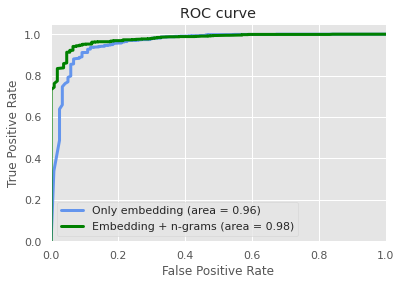

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# we will compare the two classifiers by their roc curve.
# as we already saw from the eval report, the classifer *without* affin yielded 
# better score.
plt.style.use('ggplot')
plt.plot(ev1['roc_curve']['fpr'],
         ev1['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='Only embedding (area = %0.2f)' %ev1['auc'], linewidth=3)
plt.plot(ev2['roc_curve']['fpr'],
         ev2['roc_curve']['tpr'],
         color='green',
         label='Embedding + n-grams (area = %0.2f)' %ev2['auc'],linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()